In [6]:
%system ls

['a.txt', 'entextprocessing.ipynb', 'out.png']

In [75]:
import nltk
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import PIL
import random
%matplotlib inline

In [9]:
from nltk.corpus import stopwords # Import the stop word list
print (stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no

In [11]:
lines = open("a.txt").read()

In [12]:
lines

'On the Prejudices of Philosophers\n\n1\n\nThe will to truth which will still tempt us to many a venture, that famous truthfulness of which all philosophers so far have spoken with respect - what questions has this will to truth not laid before us! What strange, wicked, questionable questions! That is a long story even now - and yet it seems as if it had scarcely begun. Is it any wonder that we should finally become suspicious, lose patience, and turn away impatiently? that we should finally learn from this Sphinx to ask questions, too? Who is it really that puts questions to us here? What in us really wants "truth"?\n\nIndeed we came to a long halt at the question about the cause of this will - until we finally came to a complete stop before a still more basic question. We asked about the value of this will. Suppose we want truth: why not rather untruth? and uncertainty? even ignorance?\n\nThe problem of the value of truth came before us - or was it we who came before the problem? Who

In [16]:
def clean_text( text, remove_sw ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", text) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    # 5. remove stopwords
    meaningful_words = []
    if remove_sw == True:
        stops = set(stopwords.words("english"))
        meaningful_words = [w for w in words if not w in stops]
    else:
        meaningful_words = words
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))

In [17]:
clean_text(lines, False)

'on the prejudices of philosophers the will to truth which will still tempt us to many a venture that famous truthfulness of which all philosophers so far have spoken with respect what questions has this will to truth not laid before us what strange wicked questionable questions that is a long story even now and yet it seems as if it had scarcely begun is it any wonder that we should finally become suspicious lose patience and turn away impatiently that we should finally learn from this sphinx to ask questions too who is it really that puts questions to us here what in us really wants truth indeed we came to a long halt at the question about the cause of this will until we finally came to a complete stop before a still more basic question we asked about the value of this will suppose we want truth why not rather untruth and uncertainty even ignorance the problem of the value of truth came before us or was it we who came before the problem who of us is oedipus here who the sphinx it is 

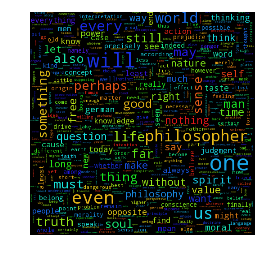

In [37]:
wordcloud = WordCloud(width = 500, height=500, max_font_size=50, relative_scaling=.5, max_words=2000).generate(clean_text(lines, False))
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.savefig('a.png')

In [40]:
image = wordcloud.to_image()

In [41]:
image.save('a.png')

In [56]:
def gen_ngrams(words, n):
    """Takes in a list of words and generates ngrams"""
    if len(words) < n:
        return
    ngram = []
    for i in range(len(words) - (n-1)):
        phrase = []
        for j in range(n):
            phrase.append(words[i+j])
        ngram.append(phrase)
    return ngram

In [51]:
grams = gen_ngrams(clean_text(lines, False).split(), 10)

In [52]:
len(grams)

14139

In [89]:
grams[0]

['on',
 'the',
 'prejudices',
 'of',
 'philosophers',
 'the',
 'will',
 'to',
 'truth',
 'which']

In [177]:
cache = {}
def database(grams):
    for gram in grams:
        key = (gram[0], gram[1])
        if key in cache:
            cache[key].append(gram[2:])
        else:
            cache[key] = [gram[2:]]

In [178]:
database(grams)

In [192]:
stops = set(stopwords.words("english"))
def generate_markov_text(size=9):
    seedg = random.randint(0, len(grams)-1)
    seedw = random.randint(0,8)
    seed_word, next_word = grams[seedg][seedw], grams[seedg][seedw+1]
    w1, w2 = seed_word, next_word
    gen_words = []
    gen_words.append(w1)
    gen_words.append(w2)
    for i in range(size):
        t_gram = []
        if type(cache[(w1, w2)][0]) is str:
            t_gram = cache[(w1, w2)]
        else:
            t_gram = random.choice(cache[(w1, w2)])

        w1, w2 = t_gram[len(t_gram)-2], t_gram[len(t_gram)-1]
        for w in t_gram:
            gen_words.append(w)
    if gen_words[-1] in stops:
        gen_words = gen_words[:-1]
    return ' '.join(gen_words)

In [195]:
generate_markov_text()

'under an invisible spell they always revolve once more in short we believe that the intention is merely a sign and symptom that still requires interpretation moreover a sign that means too much and at any rate we are at this point and to ask are these not perhaps seductions that they please those who have them and those who enjoy their fruits and also the spell of physiological valuations and racial conditions'